[View in Colaboratory](https://colab.research.google.com/github/anilpdv/imdb-reviews-binary-calssification/blob/master/multiclassClassification.ipynb)

In [0]:
#loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting matplotlib to plot in the jupyter notebook
%matplotlib inline

#loading deeplearing dependencies
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

#loading the dataset
from keras.datasets import reuters

In [0]:
#splitting the dataset in to train and test
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

In [70]:
#length of the training data
print("length of the training data:",len(train_data))
print("length of the testing data:",len(test_data))

length of the training data: 8982
length of the testing data: 2246


In [71]:
#the actual data is wrapped as integers (word indices)
#to see actual word we can decode it
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


*this is actual words in the ,first row of the training data*

In [72]:
#training labels
pd.Series(train_labels).value_counts().sort_index()

0       55
1      432
2       74
3     3159
4     1949
5       17
6       48
7       16
8      139
9      101
10     124
11     390
12      49
13     172
14      26
15      20
16     444
17      39
18      66
19     549
20     269
21     100
22      15
23      41
24      62
25      92
26      24
27      15
28      48
29      19
30      45
31      39
32      32
33      11
34      50
35      10
36      49
37      19
38      19
39      24
40      36
41      30
42      13
43      21
44      12
45      18
dtype: int64

**note:** *they are 45 class labels in the dataset we can see above .*

In [73]:
#head of the training data
pd.DataFrame(train_data).head()

,0
0,"[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ..."
1,"[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,..."
2,"[1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,..."
3,"[1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46..."
4,"[1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2..."


In [0]:
#ecoding the data
def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i , sequence in enumerate(sequences):
    results[i,sequence] =1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
#you can do with built in way of  encoding the variable
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
#building a model
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(10000,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(46,activation='softmax'))

In [0]:
#compiling the model
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
#setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [79]:
#training the model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 186us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 73us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 73us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 73us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 75us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 

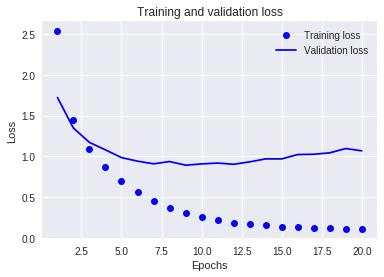

In [81]:
#plotting the training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


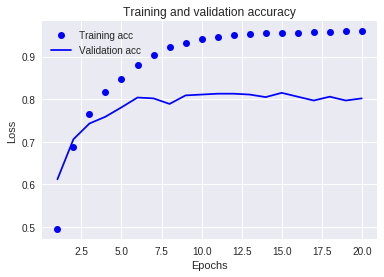

In [82]:
#plotting the training and validation accuracy
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()